# Session 31-32 - Regression

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [3]:
data = {
    'posisi' : ['Business Analyst', 'Junior Consultant', 'Senior Consultant', 'Manager', 'Country Manager', 'Technical Conusltant Manager', 'Supervisor', 'Professional Service', 'Solution Architect', 'Direction'],
    'Level' : [i for i in range(1, 11)],
    'Salary' : [45000, 50000, 60000, 80000, 110000, 160000, 200000, 300000, 500000, 1000000]
}

df = pd.DataFrame(data)
df

,posisi,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Technical Conusltant Manager,6,160000
6,Supervisor,7,200000
7,Professional Service,8,300000
8,Solution Architect,9,500000
9,Direction,10,1000000


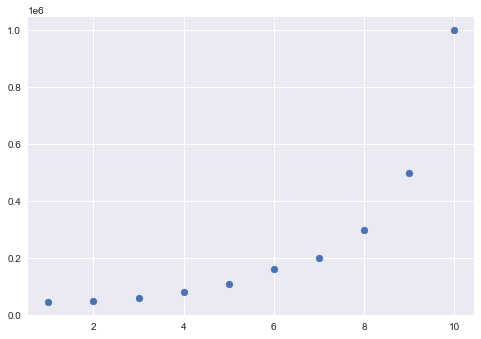

In [4]:
plt.scatter(df['Level'], df['Salary'])

In [5]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

### Simple Linear Regression

In [6]:
lr = LinearRegression()
# Modelling
lr.fit(X, y)

LinearRegression()

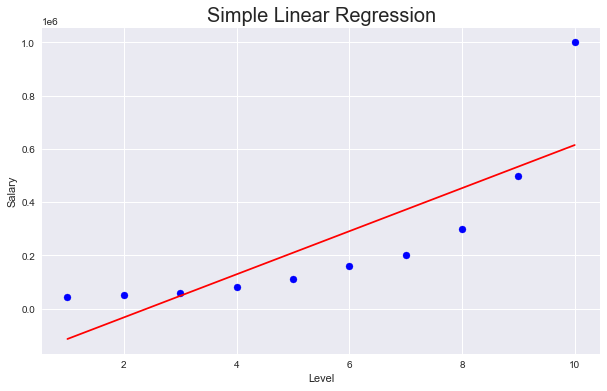

In [7]:
y_pred = lr.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Predict')
plt.title('Simple Linear Regression', fontsize=20)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### Polynomial Regression

In [8]:
poly_2 = PolynomialFeatures(degree=2)
poly_3 = PolynomialFeatures(degree=3)

X_poly_2 = poly_2.fit_transform(X)
X_poly_3 = poly_3.fit_transform(X)

In [9]:
# Modelling
lr2 = LinearRegression()
lr3 = LinearRegression()

lr2.fit(X_poly_2, y)
lr3.fit(X_poly_3, y)

LinearRegression()

In [10]:
y_pred_2 = lr2.predict(X_poly_2)
y_pred_3 = lr3.predict(X_poly_3)

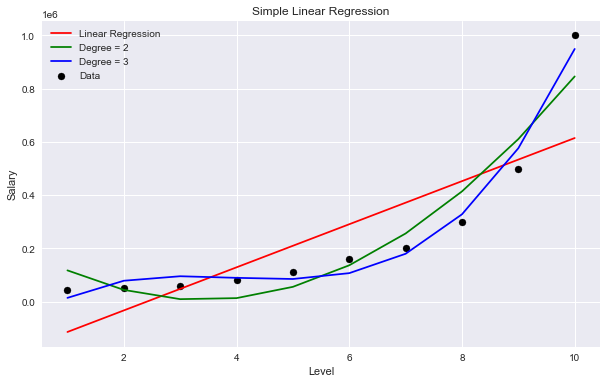

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.plot(X, y_pred_2, color='green', label='Degree = 2')
plt.plot(X, y_pred_3, color= 'blue', label='Degree = 3')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

## Auto Mobile

### Import Dataset

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
df_auto = pd.read_csv('Automobile_data.csv')
df_auto.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950


In [14]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Data Cleansing

#### Check for Duplicates

In [15]:
df_auto.duplicated().any()

False

#### Handling Incorrent Data

In [16]:
for col in df_auto.select_dtypes('object').columns:
    print(f'{col} : ', df_auto[col].unique())
    print('=='*20)

normalized-losses :  ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make :  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type :  ['gas' 'diesel']
aspiration :  ['std' 'turbo']
num-of-doors :  ['two' 'four' '?']
body-style :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels :  ['rwd' 'fwd' '4wd']
engine-location :  ['front' 'rear']
engine-type :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
num-of-cylinders :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel-system :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
bore :  

Karena terdapat nilai yang salah (terdapat karakter "?") pada beberapa kolom, maka kita ubah karakter tersebut dengan nilai NaN.

In [17]:
list_columns = list(df_auto.columns)

for col in list_columns:
    df_auto.loc[df_auto[col]=='?', col] = np.nan

#### Handling Missing Values

In [18]:
def missing_data(data):    
    df_miss = pd.DataFrame(data.isnull().sum()).reset_index()
    df_miss.columns = ['column', 'count']
    df_miss = df_miss.loc[df_miss['count'] != 0]
    df_miss['percent'] = round((df_miss['count']/data.shape[0])*100, 2)
    data_type = []
    example_data = []
    for col in list(df_miss['column']):
        data_type.append(data[col].dtype)
        example_data.append(data[col][100])
    df_miss['DataType'] = data_type
    df_miss['Example'] = example_data
    return df_miss

In [19]:
missing_data(df_auto)

,column,count,percent,DataType,Example
1,normalized-losses,41,20.00,object,106
5,num-of-doors,2,0.98,object,four
18,bore,4,1.95,object,3.33
19,stroke,4,1.95,object,3.47
21,horsepower,2,0.98,object,97
22,peak-rpm,2,0.98,object,5200
25,price,4,1.95,object,9549


Karena masih terdapat missing values, dan untuk melakukan imputasi tipe datanya harus numerik, maka ubah dulu tipe data setiap kolom menjadi float. Nilai float digunakan karena kita tidak bisa merubah tipe data menjadi integer ketika masih mempunyai missing values.

In [20]:
float_column = ['normalized-losses', 'horsepower', 'peak-rpm', 'bore', 'stroke']

for col in float_column:
    df_auto[col] = df_auto[col].astype('float64')

In [21]:
col_miss = ['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

df_auto[col_miss].head()

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm,price
0,NaN,two,3.47,2.68,111.0,5000.0,13495
1,NaN,two,3.47,2.68,111.0,5000.0,16500
2,NaN,two,2.68,3.47,154.0,5000.0,16500
3,164.0,four,3.19,3.40,102.0,5500.0,13950
4,164.0,four,3.19,3.40,115.0,5500.0,17450


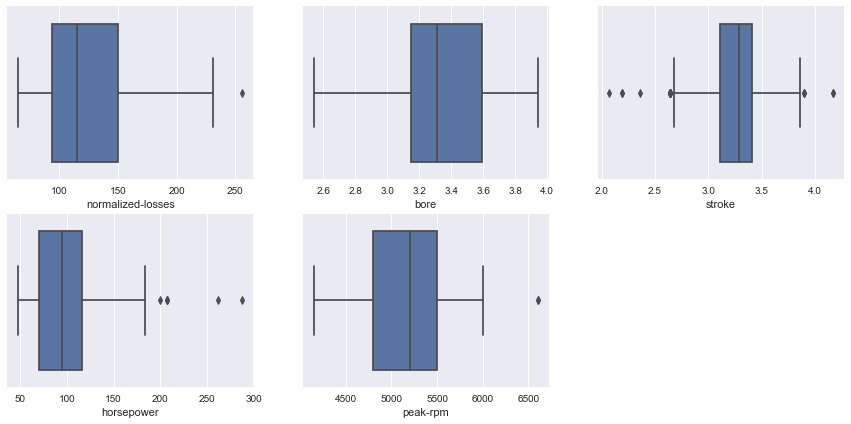

In [22]:
pos = 1
num_col_miss = df_auto[col_miss].select_dtypes('number').columns

plt.figure(figsize=(15, 7))
for i in num_col_miss:
    plt.subplot(2, 3, pos)
    sns.boxplot(data=df_auto, x=i)
    pos += 1
    

Karena distribusi data pada setiap kolom berbeda-beda, maka untuk menangani missing value tersebut juga berbeda-beda. Skenario : <br>
- Gunakan nilai median pada data yang mempunyai outliers
- Gunakan nilai mean pada data yang tidak mempunyai outliers


In [23]:
median_column = ['normalized-losses', 'horsepower', 'stroke', 'peak-rpm']
mean_column = ['bore']

for col in median_column:
    df_auto[col] = df_auto[col].fillna(df_auto[col].median())

for col in mean_column:
    df_auto[col] = df_auto[col].fillna(df_auto[col].mean())

In [24]:
missing_data(df_auto)

,column,count,percent,DataType,Example
5,num-of-doors,2,0.98,object,four
25,price,4,1.95,object,9549


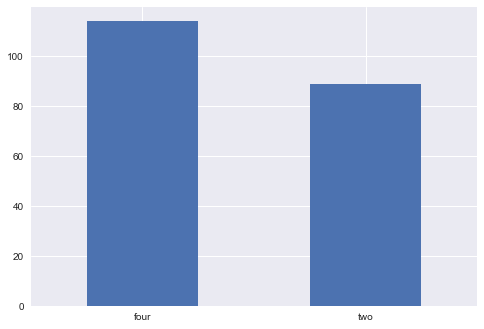

In [25]:
df_auto['num-of-doors'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

Jika kita lihat, kebanyakan model ternyata memiliki pintu berjumlah empat.

Untuk mengisi missing value pada kolom kategorikal, sebenarnya kita bisa gunakan nilai modus. Tetapi kita ingin pastikan dahulu baris mana yang mempunyai missing value.

In [26]:
df_auto[df_auto['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1.0,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191.0,ohc,four,98.0,mpfi,3.03,3.39,7.6,102.0,5500.0,24.0,30.0,8558
63,0.0,115.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443.0,ohc,four,122.0,idi,3.39,3.39,22.7,64.0,4650.0,36.0,42.0,10795


Jika kita lihat, baris yang memiliki missing value pada kolom num-of-doors adalah untuk mobil jenis sedan. Maka kita akan lihat kebanyakan mobil sedan ada berapa jumlah pintunya.

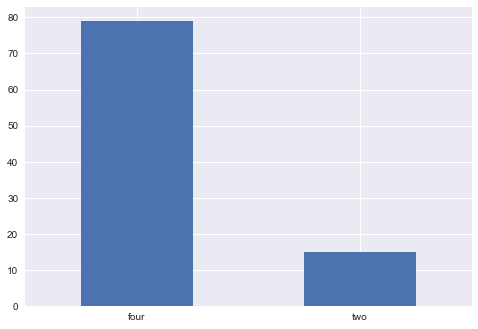

In [27]:
df_auto[df_auto['body-style'] == 'sedan']['num-of-doors'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

Ternyata untuk mobil berjenis sedan pun kebanyakan memiliki pintu berjumlah empat. Maka kita bisa gunakan nilai modus.

In [28]:
df_auto['num-of-doors'] = df_auto['num-of-doors'].fillna(df_auto['num-of-doors'].mode()[0])

In [29]:
missing_data(df_auto)

,column,count,percent,DataType,Example
25,price,4,1.95,object,9549


Hanya tersisa satu kolom yang memiliki missing value. Karena kolom price adalah kolom target, maka untuk menangani hal  tersebut kita bisa drop baris yang memiliki missing value.

In [30]:
df_auto.dropna(inplace=True)

In [31]:
missing_data(df_auto)

,column,count,percent,DataType,Example


Karena beberapa kolom seharunya bertipe data integer, maka kita ubah tipe data beberapa kolom tersebut.

In [32]:
int_col = ['normalized-losses', 'horsepower', 'peak-rpm']

for col in int_col:
    df_auto[col] = df_auto[col].astype('int64')

In [33]:
df_auto.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500


In [34]:
df_auto.shape

(201, 26)

#### Outliers

In [37]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    float64
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    float64
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

Karena kolom price masih bertipe object, maka kita ubah tipe datanya menjadi integer.

In [38]:
df_auto['price'] = df_auto['price'].astype('int64')

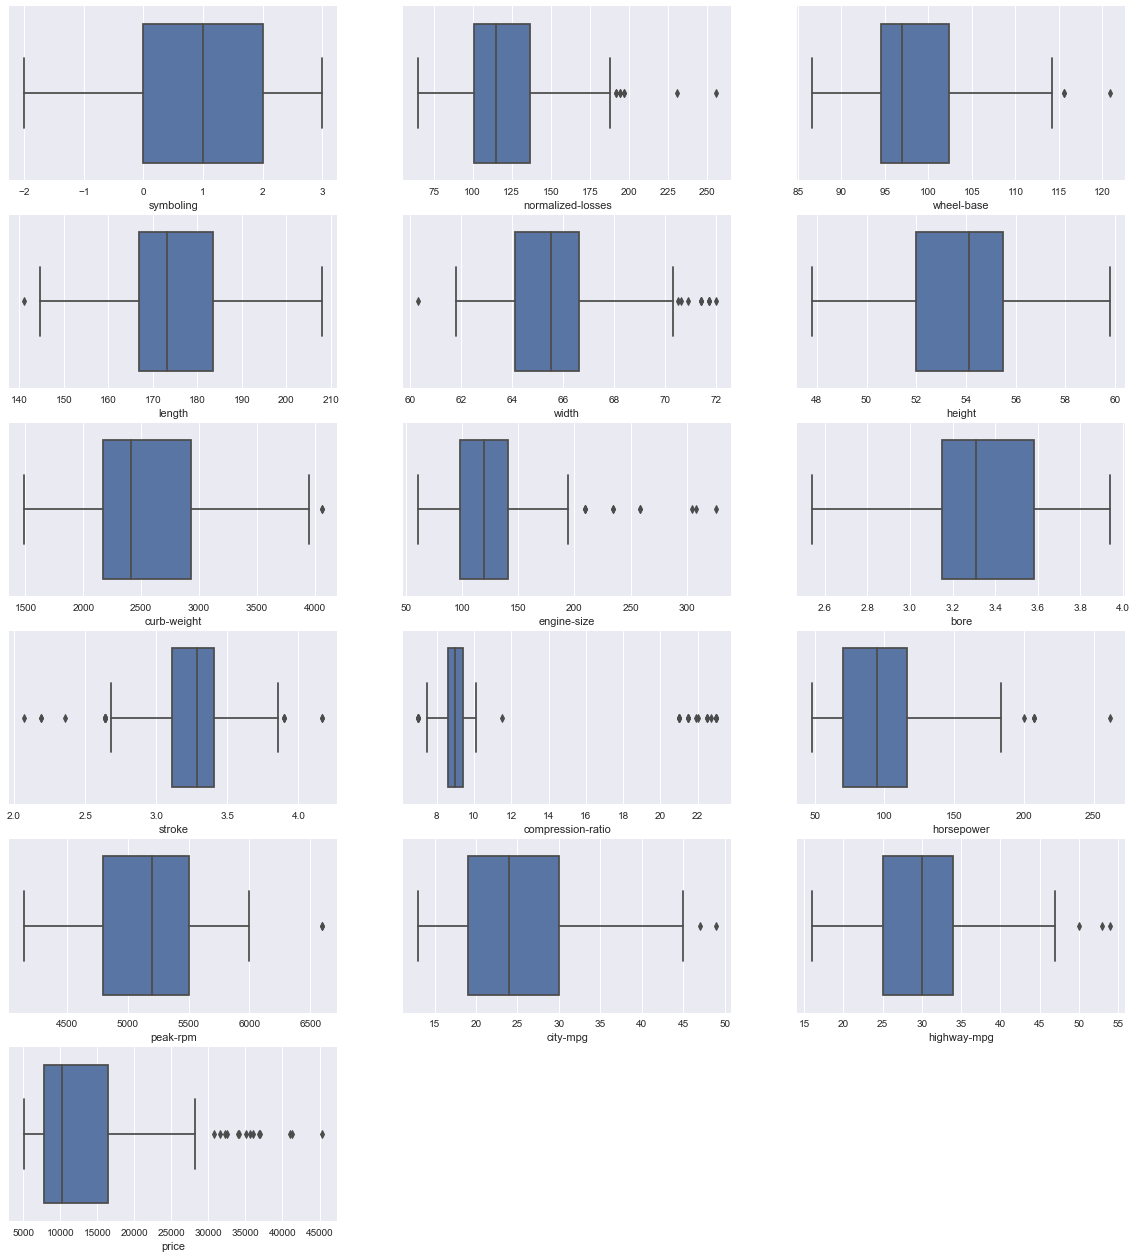

In [39]:
# get all numerical columns
num_col = df_auto.select_dtypes('number').columns

plt.figure(figsize=(20, 30))
pos = 1

# Loops for numerical feature 
for i in num_col:
    plt.subplot(8, 3, pos)
    sns.boxplot(data=df_auto, x=i)
    pos += 1

### Exploratory Data Analysis

Apakah horsepower berkorelasi dengan harga?

In [40]:
hp = df_auto[['horsepower']].values
price = df_auto[['price']].values

In [41]:
lr = LinearRegression()

lr.fit(hp, price)

LinearRegression()

In [42]:
y_pred = lr.predict(hp)

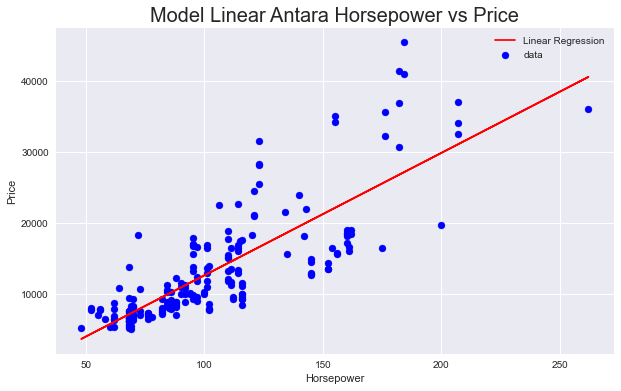

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(hp, price, c='blue', label='data')
plt.plot(hp, y_pred, c='red', label='Linear Regression')
plt.title('Model Linear Antara Horsepower vs Price', fontsize=20)
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import r2_score

print('R-Squared :', r2_score(price, y_pred))

R-Squared : 0.6569103000026629


Bagaimana hubungan antara tipe bahan bakan dengan harga?

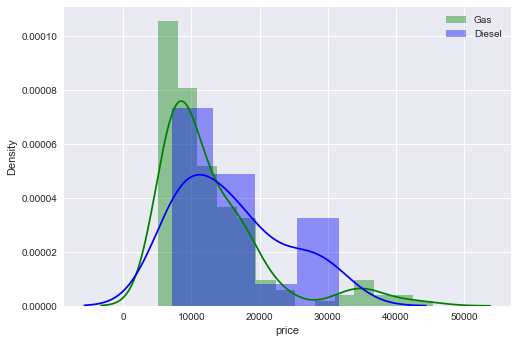

In [45]:
sns.distplot(df_auto.loc[df_auto['fuel-type']=='gas', 'price'], color='green', label='Gas')
sns.distplot(df_auto.loc[df_auto['fuel-type']=='diesel', 'price'], color='blue', label='Diesel')
plt.legend()
plt.show()

### Data Preparation

In [46]:
cat_col = df_auto.select_dtypes('object').columns
num_col = df_auto.select_dtypes('number').columns

In [47]:
for i in cat_col:
    print(f'{i} : ', df_auto[i].nunique())

make :  22
fuel-type :  2
aspiration :  2
num-of-doors :  2
body-style :  5
drive-wheels :  3
engine-location :  2
engine-type :  6
num-of-cylinders :  7
fuel-system :  8


In [48]:
for i in cat_col:
    print(f'{i} : ', df_auto[i].unique())
    print('-'*20)

make :  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
--------------------
fuel-type :  ['gas' 'diesel']
--------------------
aspiration :  ['std' 'turbo']
--------------------
num-of-doors :  ['two' 'four']
--------------------
body-style :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
--------------------
drive-wheels :  ['rwd' 'fwd' '4wd']
--------------------
engine-location :  ['front' 'rear']
--------------------
engine-type :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
--------------------
num-of-cylinders :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
--------------------
fuel-system :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
--------------------


#### Feature Encoding

In [49]:
one_hot_col = ['make', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']
binary_col = ['fuel-type', 'aspiration', 'engine-location']
encode_find = {
    'num-of-cylinders':{'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8},
    'num-of-doors': {'two': 2, 'four': 4}
}

df_auto.replace(encode_find, inplace=True)

#label encoding
encoder = LabelEncoder()

for col in binary_col:
    df_auto[col] = encoder.fit_transform(df_auto[col])

# One-Hot Encoding
df_auto = pd.get_dummies(df_auto)

#### Train Test Split

In [50]:
# feature independen
X = df_auto.drop('price', axis=1)

#feature dependen
y = df_auto[['price']]

In [51]:
# Separate train and test test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelling

In [52]:
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [53]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

### Evaluation

In [57]:
# mean absolute error
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
# mean squared error
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# root mean squared error
rmse_dt = np.sqrt(mse_dt)
rmse_rf = np.sqrt(mse_rf)

In [59]:
pd.DataFrame({
    'MAE':[mae_dt, mae_rf],
    'MSE':[mse_dt, mse_rf],
    'RMSE':[rmse_dt,rmse_rf]
}, index=['DecisionTreeRegresor', 'RandomForestRegressor'])

,MAE,MSE,RMSE
DecisionTreeRegresor,2096.975610,8.821839e+06,2970.158023
RandomForestRegressor,1899.557404,8.703943e+06,2950.244591


Jika kita lihat, model Random Forest memiliki nilai error paling kecil dari Decision Tree. 
> Maka bisa dikatakan bahwa Random Forest menjadi model yang paling baik.